In [2]:
print("""
@File         : 2-plotting_with_pandas.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-11 21:18:31
@Email        : cuixuanstephen@gmail.com
@Description  : Plotting with pandas
""")


@File         : 2-plotting_with_pandas.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-11 21:18:31
@Email        : cuixuanstephen@gmail.com
@Description  : Plotting with pandas



In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    "data/fb_stock_prices_2018.csv",
    index_col="date", parse_dates=True
)

quakes = pd.read_csv("data/earthquakes.csv")

covid = pd.read_csv("data/covid19_cases.csv").assign(
    date=lambda x: pd.to_datetime(x["dateRep"], format="%d/%m/%Y")
).set_index("date").replace("United_States_of_America", "USA").sort_index()["2020-01-18": "2020-09-18"]

#### Evolution over time

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

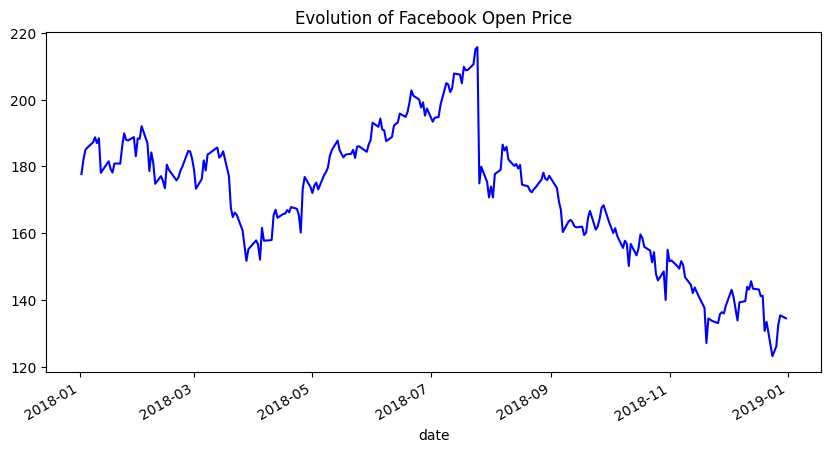

In [4]:
fb.plot(kind="line", y="open", figsize=(10, 5), style='-b', legend=False, 
        title="Evolution of Facebook Open Price")

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

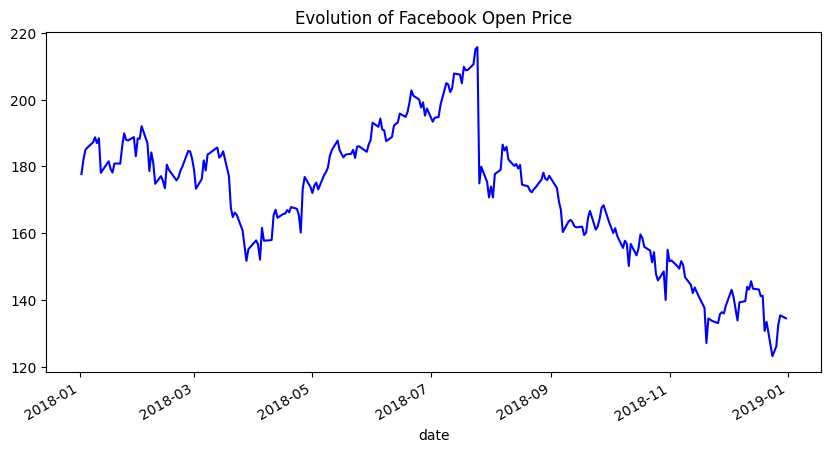

In [5]:
fb.plot(kind="line", y="open", figsize=(10, 5), color="blue", linestyle="solid", legend=False, 
        title="Evolution of Facebook Open Price")

C:\Users\JPL-JUNO\AppData\Local\Temp\ipykernel_6924\3684991546.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first("1W").plot(


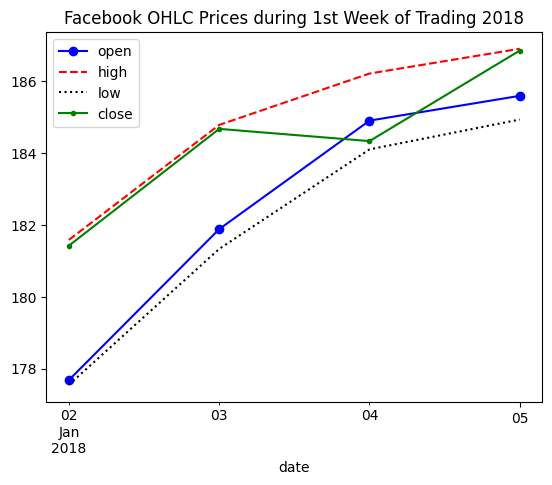

In [6]:
fb.first("1W").plot(
    y=["open", "high", "low", "close"],
    style=["o-b", "--r", ":k", ".-g"],
    title="Facebook OHLC Prices during 1st Week of Trading 2018"
).autoscale()

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

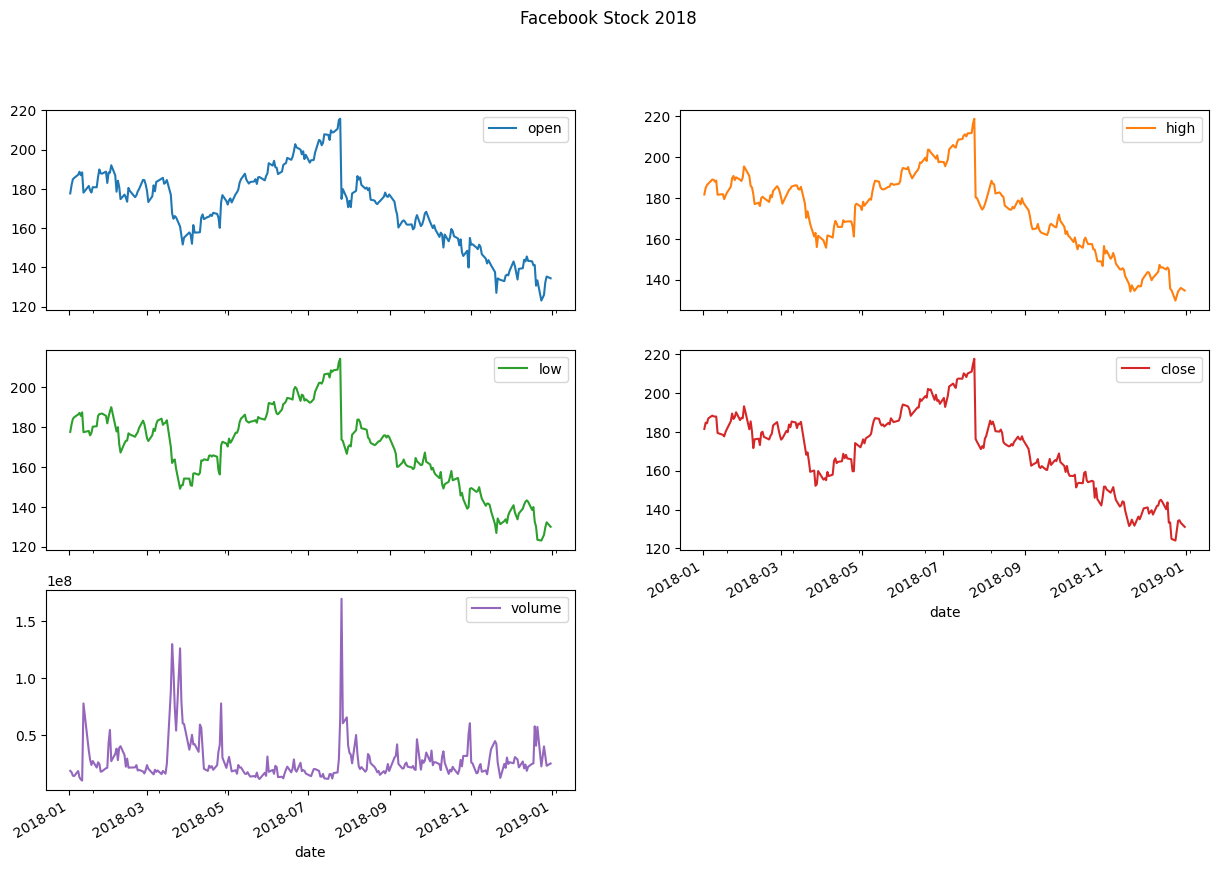

In [7]:
fb.plot(
    kind="line", subplots=True, layout=(3, 2),
    figsize=(15, 10), title="Facebook Stock 2018"
)

In [8]:
new_cases_rolling_average = covid.pivot(columns="countriesAndTerritories", values="cases").fillna(0).rolling(7).mean()

<Axes: xlabel='date'>

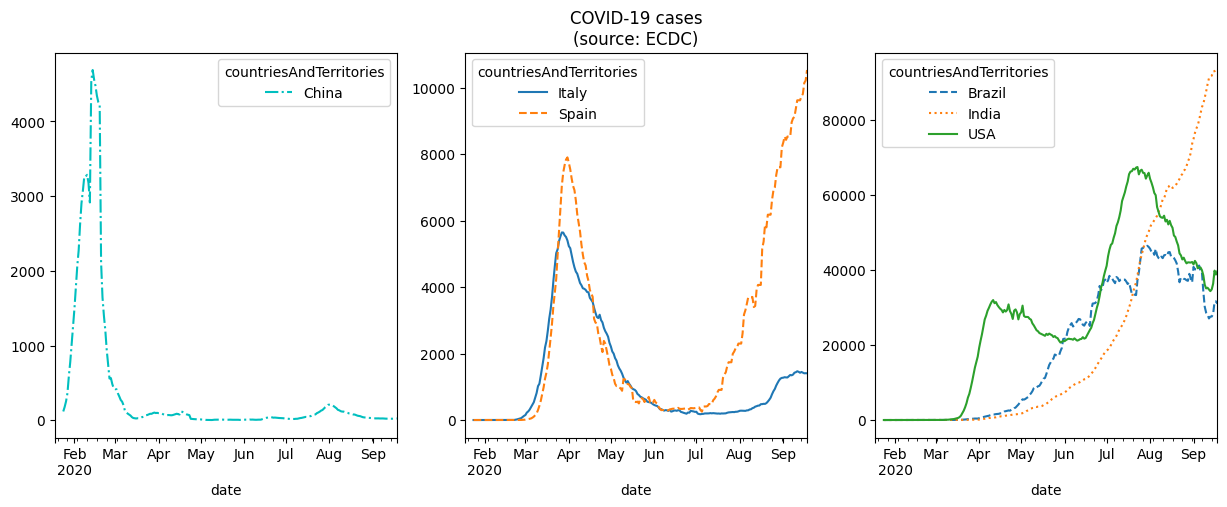

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[["Italy", "Spain"]].plot(ax=axes[1],
                                                   style=['-', "--"],
                                                   title="COVID-19 cases\n(source: ECDC)")
new_cases_rolling_average[["Brazil", "India", "USA"]].plot(ax=axes[2], style=["--", ":", "-"])

<Axes: title={'center': '7-day rolling average of new COVID-19 cases\n(source: ECDC)'}, xlabel='date'>

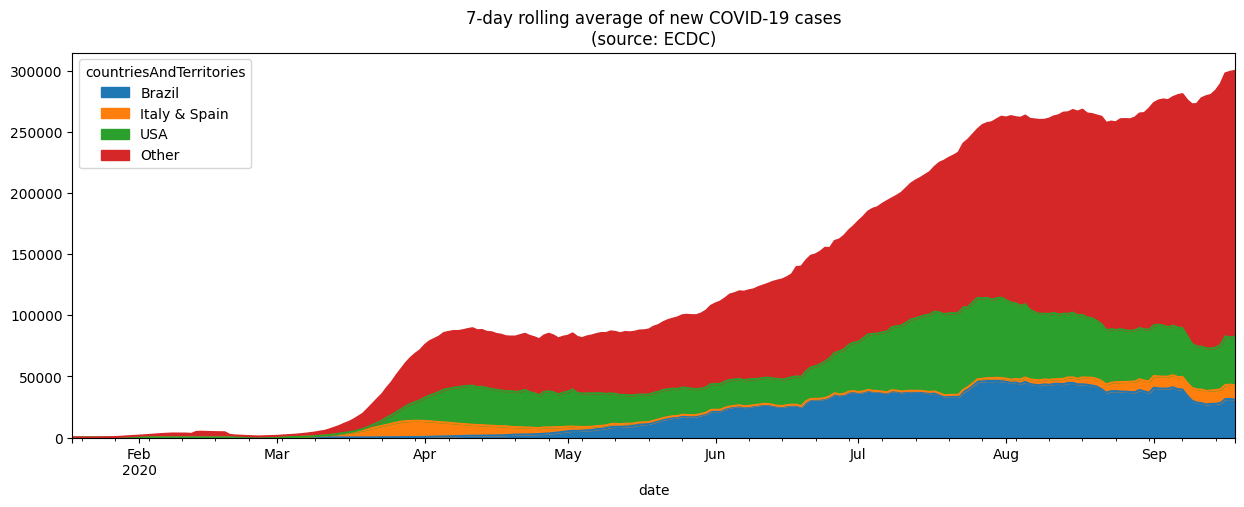

In [10]:
cols = [
    col for col in new_cases_rolling_average.columns
    if col not in ["USA", "Brazil", "Italy & Spain"]
]

new_cases_rolling_average.assign(
    **{'Italy & Spain': lambda x: x["Italy"] + x["Spain"]}
).sort_index(axis='columns').assign(
    Other=lambda x: x[cols].sum(axis='columns')
).drop(columns=cols).plot(
    kind="area", figsize=(15, 5),
    title="7-day rolling average of new COVID-19 cases\n(source: ECDC)"
)

<Axes: xlabel='date'>

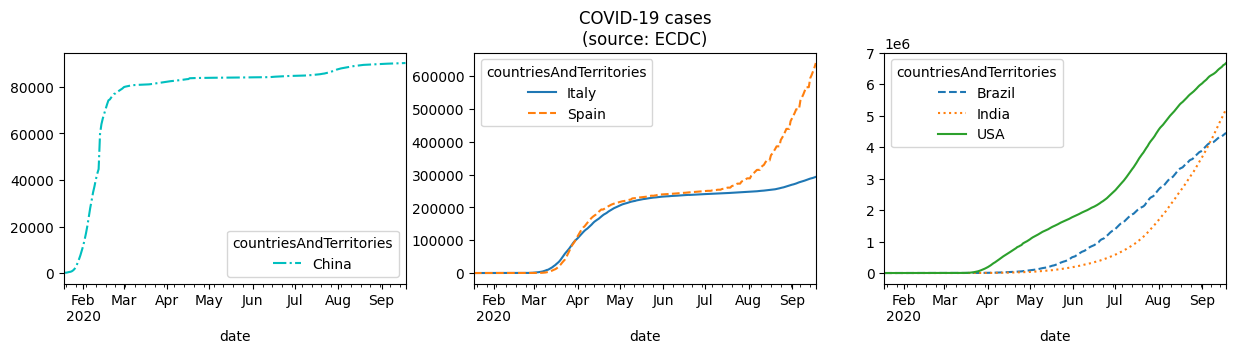

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

cumulative_covid_cases = covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]
)['cases'].sum().unstack(level=0).cumsum()

cumulative_covid_cases[['China']].plot(ax=axes[0], style='-.c')
cumulative_covid_cases[["Italy", "Spain"]].plot(ax=axes[1],
                                                style=['-', "--"],
                                                title="COVID-19 cases\n(source: ECDC)")
cumulative_covid_cases[["Brazil", "India", "USA"]].plot(ax=axes[2], style=["--", ":", "-"])

#### Relationships between variables

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

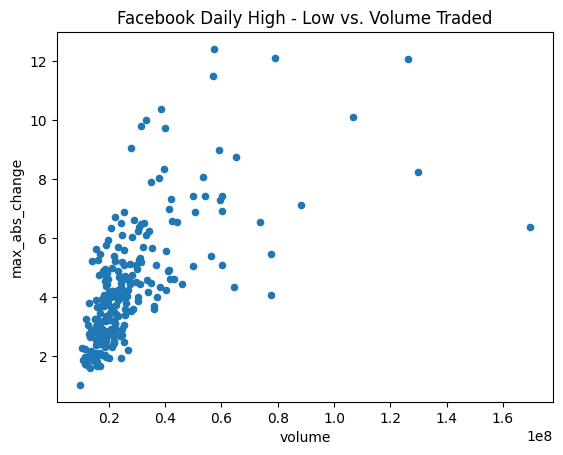

In [12]:
fb.assign(
    max_abs_change=lambda x: x["high"] - x["low"]
).plot(kind='scatter', x='volume', y='max_abs_change',
       title="Facebook Daily High - Low vs. Volume Traded")

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

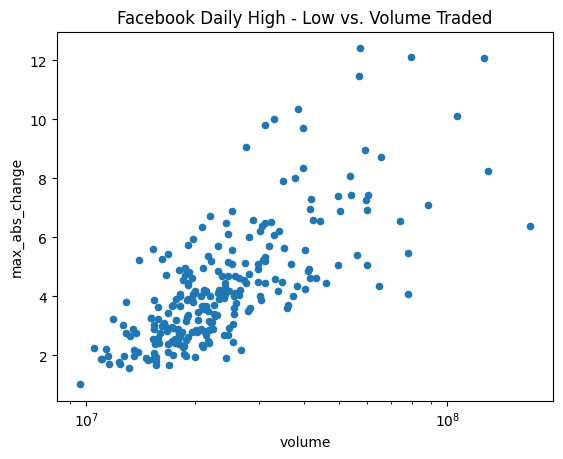

In [13]:
fb.assign(
    max_abs_change=lambda x: x["high"] - x["low"]
).plot(kind='scatter', x='volume', y='max_abs_change',
       title="Facebook Daily High - Low vs. Volume Traded",
       logx=True)

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

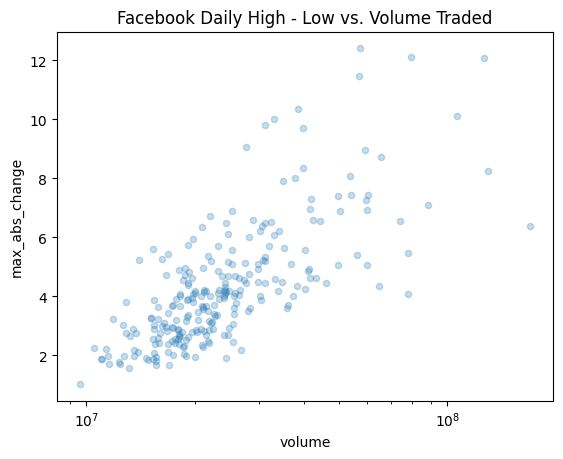

In [14]:
fb.assign(
    max_abs_change=lambda x: x["high"] - x["low"]
).plot(kind='scatter', x='volume', y='max_abs_change',
       title="Facebook Daily High - Low vs. Volume Traded",
       logx=True, alpha=.25)

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

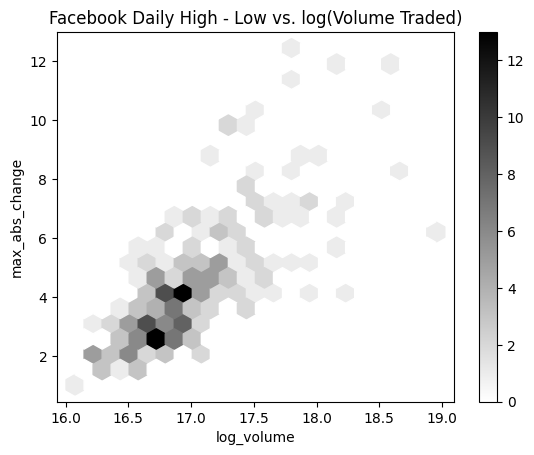

In [15]:
fb.assign(
    max_abs_change=lambda x: x["high"] - x["low"],
    log_volume=lambda x: np.log(x["volume"])
).plot(kind='hexbin', x='log_volume', y='max_abs_change',
       title="Facebook Daily High - Low vs. log(Volume Traded)",
       colormap='gray_r', gridsize=20, sharex=False)

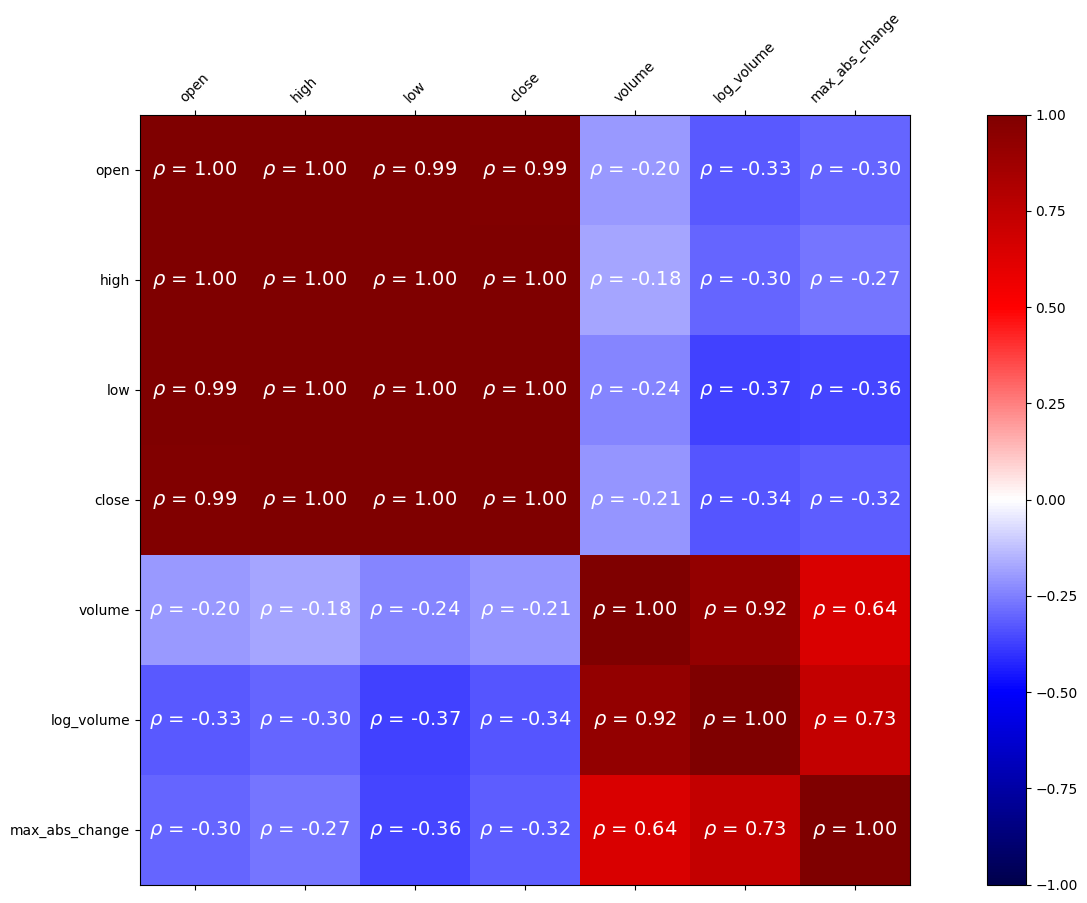

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))

fb_corr = fb.assign(
    log_volume=lambda x: np.log(x["volume"]),
    max_abs_change=lambda x: x["high"] - x["low"]
).corr()


im = ax.matshow(fb_corr, cmap="seismic")
im.set_clim(-1, 1)
fig.colorbar(im)

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1])
# ax.get_xticks()
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1])
ax.set_yticklabels(labels=labels)
for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(i, j, fr"$\rho$ = {coef:.2f}",
            ha='center', va='center', color="white", fontsize=14)

#### Distributions

Text(0.5, 0, 'Volume Traded')

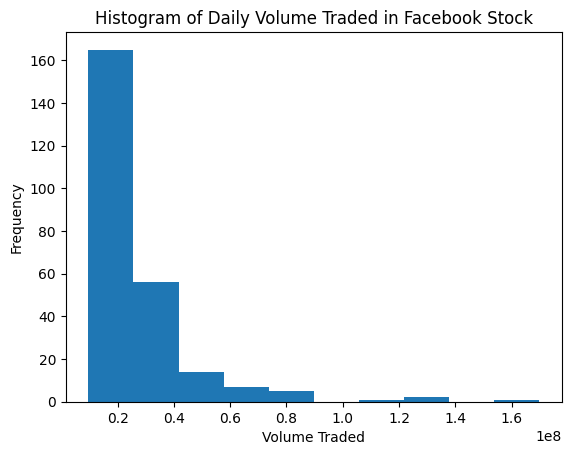

In [27]:
fb['volume'].plot(
    kind='hist',
    title="Histogram of Daily Volume Traded in Facebook Stock"
)
plt.xlabel("Volume Traded")

Text(0.5, 0, 'magnitude')

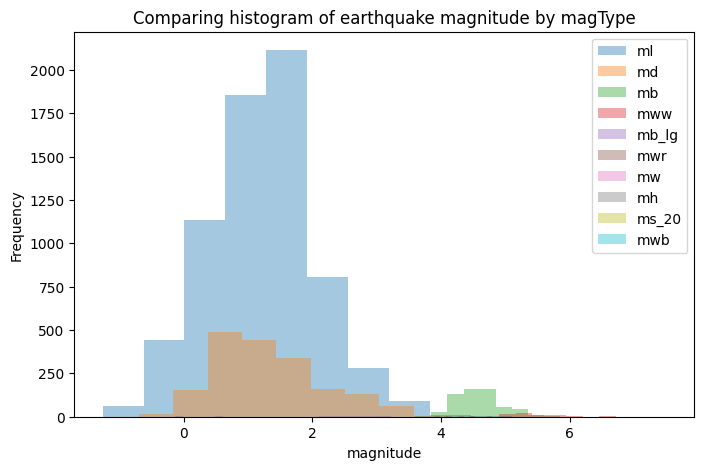

In [29]:
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in quakes["magType"].unique():
    data = quakes.query(f"magType == '{magtype}'")["mag"]
    if not data.empty:
        data.plot(kind="hist", ax=axes, alpha=.4, label=magtype, legend=True, 
                  title="Comparing histogram of earthquake magnitude by magType")
        
plt.xlabel("magnitude")

Text(0.5, 0, 'Price ($)')

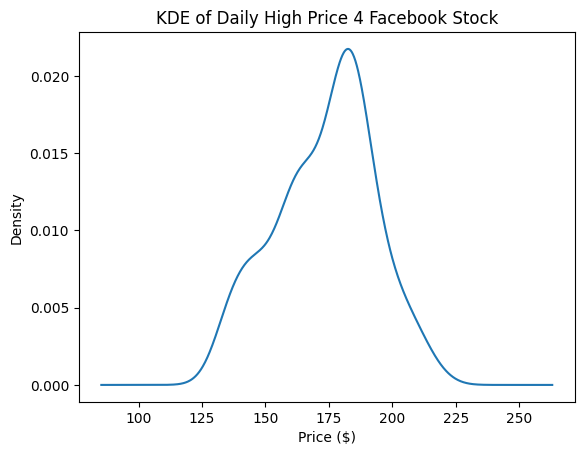

In [31]:
fb["high"].plot(
    kind='kde',
    title="KDE of Daily High Price 4 Facebook Stock"
)

plt.xlabel("Price ($)")

Text(0.5, 0, 'Price ($)')

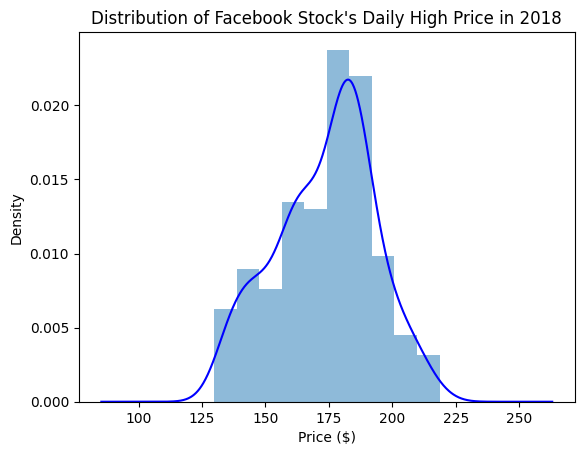

In [33]:
ax = fb["high"].plot(kind='hist', density=True, alpha=.5)

fb['high'].plot(
    kind='kde', ax=ax, color='blue', 
    title="Distribution of Facebook Stock\'s Daily High Price in 2018"
)
plt.xlabel("Price ($)")

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

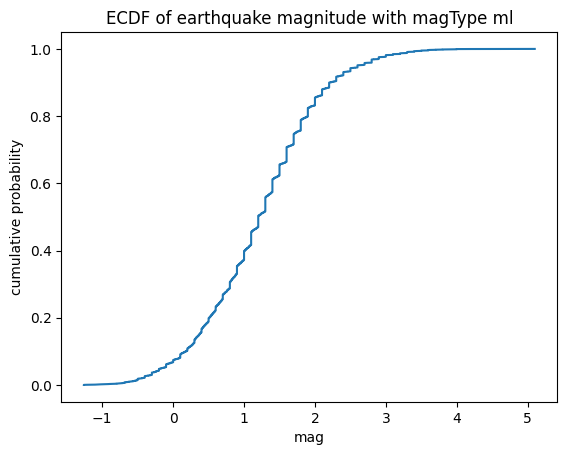

In [37]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query("magType == 'ml'")["mag"])
plt.plot(ecdf.x, ecdf.y)
plt.xlabel("mag")
plt.ylabel("cumulative probability")
plt.title("ECDF of earthquake magnitude with magType ml")

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

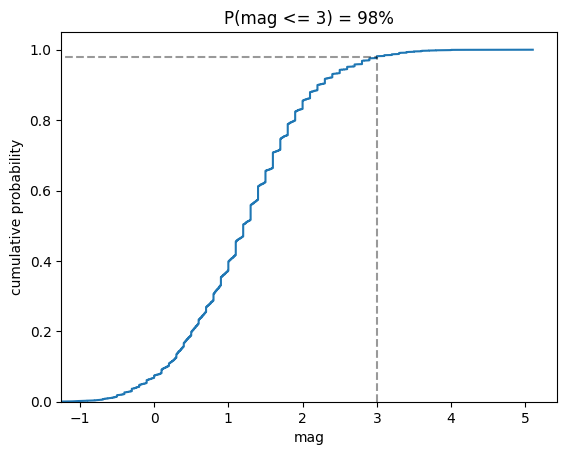

In [44]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query("magType == 'ml'")["mag"])
plt.plot(ecdf.x, ecdf.y)
plt.plot(
    [3, 3],
    [0, 0.98], '--k',
    [-1.5, 3], [0.98, 0.98], '--k', alpha=.4
)

plt.xlabel("mag")
plt.ylabel("cumulative probability")
plt.ylim(0, None)
plt.xlim(-1.25, None)
plt.title("P(mag <= 3) = 98%")

Text(0, 0.5, 'Price ($)')

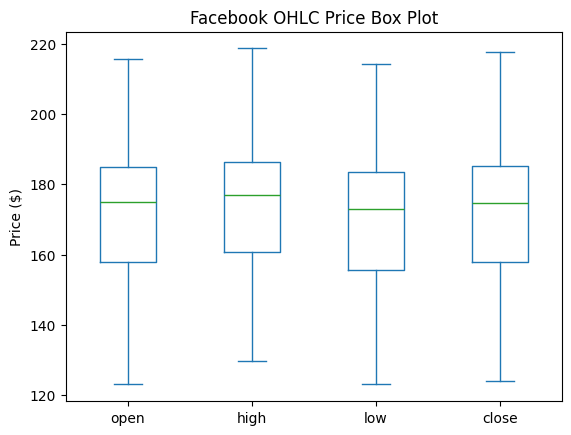

In [47]:
fb.iloc[:, :4].plot(
    kind='box',
    title="Facebook OHLC Price Box Plot"
)
plt.ylabel("Price ($)")

Text(0, 0.5, 'Price ($)')

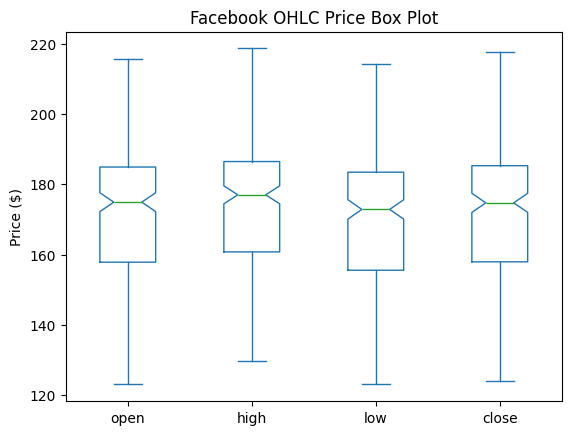

In [48]:
fb.iloc[:, :4].plot(
    kind='box',
    title="Facebook OHLC Price Box Plot", notch=True
)
plt.ylabel("Price ($)")

Text(0.5, 1.1, 'Facebook OHLC Box Plots by Volume Traded')

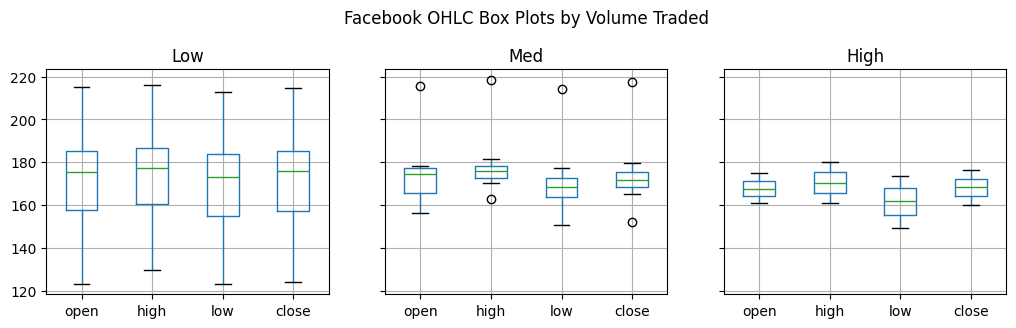

In [54]:
fb.assign(
    volume_bin=pd.cut(fb["volume"], bins=3, labels=['Low', "Med", "High"])
).groupby("volume_bin", observed=True).boxplot(column=['open', 'high', 'low', 'close'], layout=(1, 3), figsize=(12, 3))

plt.suptitle('Facebook OHLC Box Plots by Volume Traded', y=1.1)

Text(0, 0.5, 'magnitude')

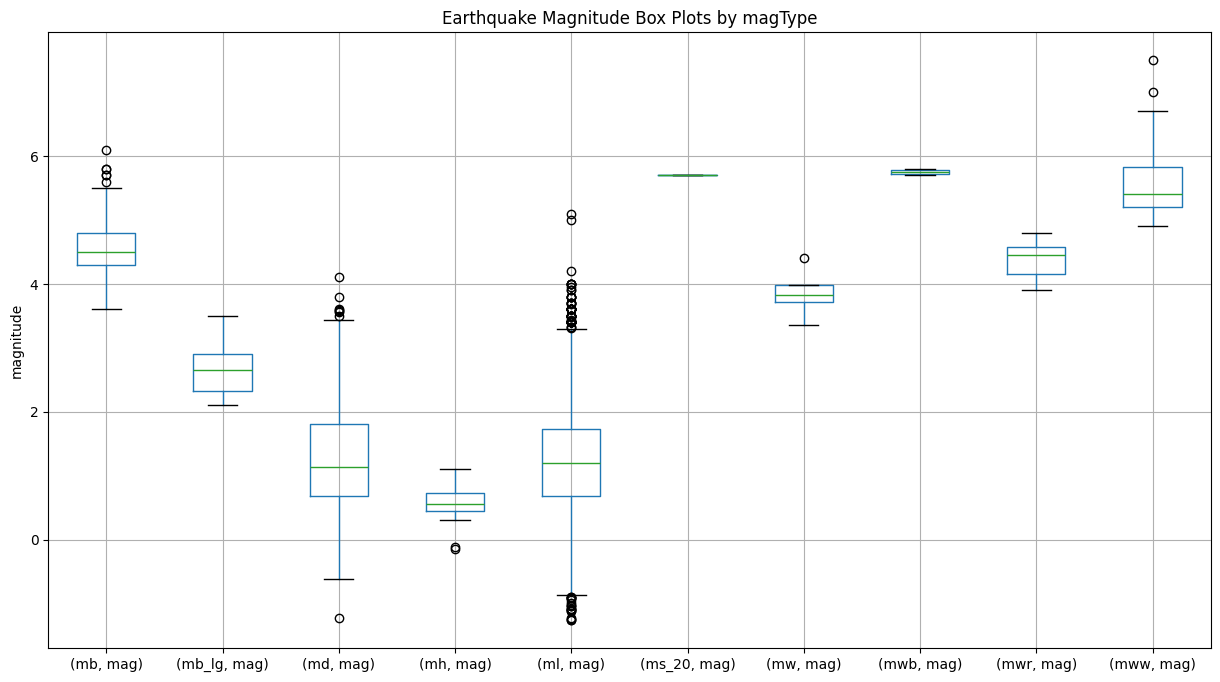

In [57]:
quakes[['mag', "magType"]].groupby("magType").boxplot(figsize=(15, 8), subplots=False)

plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude') 

> While histograms, KDEs, ECDFs, and box plots are all ways of looking at the distribution of the data, we saw that each visualization showed us a different aspect of it. It's important to visualize the data from many angles before drawing any conclusions.